In [ ]:
# Sean Dougherty
# 03/15/2022
# this file reads in the output csv filed from agn_merger.py and does some preliminary visualization
# will later become a .py file for sharing and convinience

In [ ]:
# at the end of csv processing, we want a df with bins as columns and iterations as rows
# we want 3 of these: for pair AGN fraction, iso AGN fraction, and enhancement

In [1]:
# load libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

import os

from time import sleep
from tqdm import tqdm

from multiprocessing import Pool, freeze_support, RLock
from functools import partial

import scipy.stats.distributions as dist

data_path = '/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/'
COSMOS_path = '/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/COSMOS/'

In [50]:
# print(np.__version__) #1.19.5 before upgrade

1.19.5


## Checking pair and control galaxy mass and redshift distributions

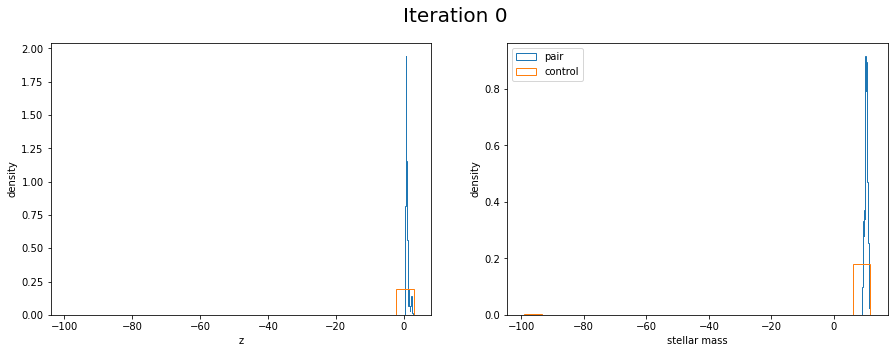

redshift medians:  0.85005 0.950275
mass medians:  10.31 10.2483525


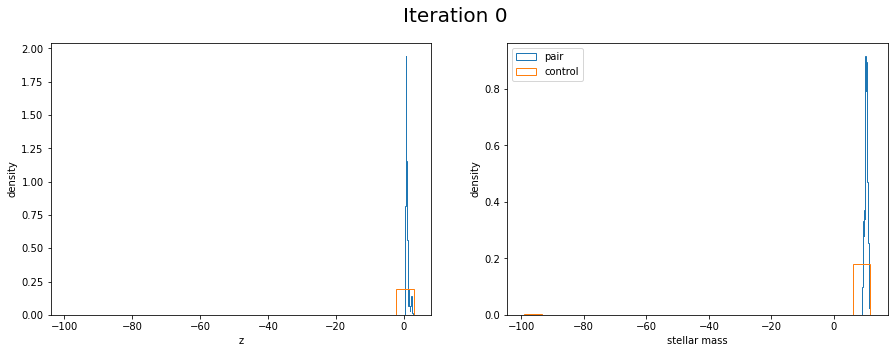

redshift medians:  0.85005 0.950275
mass medians:  10.31 10.2483525


In [2]:
# do I want to do this by bin? or per iteration?
# probably best to just randomly choose 2 or 3 iterations to look at this for

#photo-specz_results/photo-specz_'

# photo-specz_5.csv
# data_path2 = 'photo-specz_results/q_zspec_gt_1/'
# data_path2 = 'photo-specz_results/q_zspec_ge_1_wAird/'
# data_path2 = 'photo-specz_results/q_zspec_gt_1_wAird/'
# data_path2 = 'photoz_results/'
# data_path2 = 'specz_results/'
data_path2 = 'specz_results/kpc150/'


# COSMOS_path+'specz/'
# COSMOS_path+'photo-specz/'
# data_path+data_path2


# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+data_path2)), size=2)


# open each dataframe and plot distributions
for file_idx in idx:
    ran_df = pd.read_csv( data_path+data_path2+(os.listdir(data_path+data_path2))[file_idx] )
    ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) & (ran_df['prime_drawn_z'] < 3.0) ]#& 
                  # (ran_df['field'] == 'GDS')]
    
    # create arrays for distributions
    histp_z = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
    histp_M = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
    
    histc_z = np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                               np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
    histc_M = np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                               np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
    
    # make subplots to show mass and z distributions for pair and control galaxies
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    axs[0].hist(histp_z, bins=20, density=True, histtype='step')
    axs[0].hist(histc_z, bins=20, density=True, histtype='step')
    axs[0].set_xlabel('z')
    axs[0].set_ylabel('density')
    #axs[0].title['redshift']
    
    axs[1].hist(histp_M, bins=20, density=True, histtype='step', label='pair')
    axs[1].hist(histc_M, bins=20, density=True, histtype='step', label='control')
    axs[1].legend()
    axs[1].set_xlabel('stellar mass')
    axs[1].set_ylabel('density')
    
    fig.suptitle('Iteration {}'.format(file_idx), fontsize=20)
    
    #axs[1].title('iteration '+str(file_idx))
    plt.show()
    
    print( 'redshift medians: ', np.median(histp_z), np.nanmedian(histc_z) )
    print( 'mass medians: ', np.median(histp_M), np.nanmedian(histc_M) )
              

In [ ]:
ran_df

In [ ]:
# test_df = pd.read_csv('/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/photoz_TEST.csv')
ran_df = ran_df[ ran_df['kpc_sep'] < 20 ]
pairz = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
isoz =  np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                       np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
pairm = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
isom =  np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                       np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
x, bins, patches = plt.hist(pairz, bins=20, density=True, histtype='step')
plt.hist(isoz, bins=bins, density=True, histtype='step')
plt.show()

In [ ]:
ran_df2 = ran_df[ (ran_df['prime_drawn_LX'] > 42) ]
ran_df3 = ran_df[ (ran_df['partner_drawn_LX'] > 42) ]

ran_df4 = ran_df[ (ran_df['prime_control1_drawn_LX'] > 42) ]
ran_df5 = ran_df[ (ran_df['prime_control2_drawn_LX'] > 42) ]
ran_df6 = ran_df[ (ran_df['partner_control1_drawn_LX'] > 42) ]
ran_df7 = ran_df[ (ran_df['partner_control2_drawn_LX'] > 42) ]

# print(ran_df2['prime_index'])
# print(ran_df3['partner_index'])
# print(ran_df4['prime_control1_ID'])
# print(ran_df5['prime_control2_ID'])
# print(ran_df6['partner_control1_ID'])
# print(ran_df7['partner_control2_ID'])


## Pair/Control z and mass distributions over all iteration

In [ ]:
# loop through all files in directory
# keep appending the mass and redshift values -> in each bin though
# take median / mean at the end
# compliment with some kind of LX distrubutions at different mass or redshifts

In [140]:
# get the bin information -> only really need 'bins'
max_dist=150
n_bins=10
bins, bin_all_pairfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count = make_bins(max_dist=max_dist, n_bins=n_bins)

# define X-ray luminosity AGN limit
LX_AGN = 10**42

# create dictionaries for isolated / control mass / z arrays
im_dict = {}
iz_dict = {}
pm_dict = {}
pz_dict = {}

# AGN frequency ideally peaks around z=2 -> are there more AGN in galaxies at higher redshifts?
# to test this, let's keep track of (z, LX) across all iterations -> all together now
AGN_z = []
AGN_LX = []

# collect IDs to look at average spec-z count
pbin_ID = {}
ibin_ID = {}
pfield = {}
ifield = {}

# loop through the bins to create empty lists to append to
for rnge in bins:
    im_dict[bins[rnge]] = []
    iz_dict[bins[rnge]] = []
    pm_dict[bins[rnge]] = []
    pz_dict[bins[rnge]] = []
    pbin_ID[bins[rnge]] = []
    ibin_ID[bins[rnge]] = []
    pfield[bins[rnge]] = []
    ifield[bins[rnge]] = []
    
# agn_merger.py outputs:
# data_path2 = 'photo-specz_results/q_zspec_gt_1/'             # data_path+data_path2
# data_path2 = 'photo-specz_results/q_zspec_ge_1_wAird/'     # COSMOS_path+'photo-specz/kpc150/'
# data_path2 = 'photo-specz_results/q_zspec_gt_1_wAird/'     # COSMOS_path+'photoz/kpc150/'
data_path2 = 'photo-specz_results/kpc150/'                 # COSMOS_path+'specz/kpc150/'
# data_path2 = 'photoz_results/kpc100/'
# data_path2 = 'photoz_results/'
# data_path2 = 'specz_results/kpc150/'

# read through all the iteration files
for file in tqdm(os.listdir(data_path+data_path2), miniters=10):
    it_df = pd.read_csv(data_path+data_path2+file)
    it_df = it_df[ (it_df['prime_drawn_M'] > 9) & (it_df['prime_drawn_z'] < 1.25) ]#& (it_df['field'] != 'COS') ] # &
               # (it_df['field'] != 'COS') ]#(it_df['mass_ratio'] <= 0.40)]
        
    # append AGN z and LX values
    AGN_z.append( np.array( it_df.loc[it_df['prime_drawn_LX'] > LX_AGN, 'prime_drawn_z'] ) )
    AGN_z.append( np.array( it_df.loc[it_df['partner_drawn_LX'] > LX_AGN, 'partner_drawn_z'] ) )
    AGN_z.append( np.array( it_df.loc[it_df['prime_control1_drawn_LX'] > LX_AGN, 'prime_control1_drawn_z'] ) )
    AGN_z.append( np.array( it_df.loc[it_df['prime_control2_drawn_LX'] > LX_AGN, 'prime_control2_drawn_z'] ) )
    AGN_z.append( np.array( it_df.loc[it_df['partner_control1_drawn_LX'] > LX_AGN, 'partner_control1_drawn_z'] ) )
    AGN_z.append( np.array( it_df.loc[it_df['partner_control2_drawn_LX'] > LX_AGN, 'partner_control2_drawn_z'] ) )
    AGN_LX.append( np.array( it_df.loc[it_df['prime_drawn_LX'] > LX_AGN, 'prime_drawn_LX'] ) )
    AGN_LX.append( np.array( it_df.loc[it_df['partner_drawn_LX'] > LX_AGN, 'partner_drawn_LX'] ) )
    AGN_LX.append( np.array( it_df.loc[it_df['prime_control1_drawn_LX'] > LX_AGN, 'prime_control1_drawn_LX'] ) )
    AGN_LX.append( np.array( it_df.loc[it_df['prime_control2_drawn_LX'] > LX_AGN, 'prime_control2_drawn_LX'] ) )
    AGN_LX.append( np.array( it_df.loc[it_df['partner_control1_drawn_LX'] > LX_AGN, 'partner_control1_drawn_LX'] ) )
    AGN_LX.append( np.array( it_df.loc[it_df['partner_control2_drawn_LX'] > LX_AGN, 'partner_control2_drawn_LX'] ) )
                 
    
    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])
        
        # sort into bins
        bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]
        
        # append all mass and z values to appropriate dictionaries
        im_dict[bins[rnge]].append( np.concatenate((bin_df.loc[ (bin_df['prime_control1_drawn_M'] != -99), 'prime_control1_drawn_M'],
                                                    bin_df.loc[ (bin_df['prime_control2_drawn_M'] != -99), 'prime_control2_drawn_M'],
                                                    bin_df.loc[ (bin_df['partner_control1_drawn_M'] != -99), 'partner_control1_drawn_M'],
                                                    bin_df.loc[ (bin_df['partner_control2_drawn_M'] != -99), 'partner_control2_drawn_M'])) )
        
        iz_dict[bins[rnge]].append( np.concatenate((bin_df.loc[ (bin_df['prime_control1_drawn_z'] != -99), 'prime_control1_drawn_z'],
                                                    bin_df.loc[ (bin_df['prime_control2_drawn_z'] != -99), 'prime_control2_drawn_z'],
                                                    bin_df.loc[ (bin_df['partner_control1_drawn_z'] != -99), 'partner_control1_drawn_z'],
                                                    bin_df.loc[ (bin_df['partner_control2_drawn_z'] != -99), 'partner_control2_drawn_z'])) )
        
        pm_dict[bins[rnge]].append( np.concatenate((np.array(bin_df['prime_drawn_M']),
                                   np.array(bin_df['partner_drawn_M'])), axis=0) )
        pz_dict[bins[rnge]].append( np.concatenate((np.array(bin_df['prime_drawn_z']),
                                   np.array(bin_df['partner_drawn_z'])), axis=0) )
        pbin_ID[bins[rnge]].append( np.concatenate( (bin_df['prime_cat_ID'], bin_df['partner_cat_ID']) ) )
        pfield[bins[rnge]].append( np.concatenate( (bin_df['field'], bin_df['field']) ) )
                                                            
        ibin_ID[bins[rnge]].append( np.concatenate( (bin_df.loc[ bin_df['prime_control1_cat_ID'] >= 0, 'prime_control1_cat_ID'],
                                                     bin_df.loc[ bin_df['prime_control2_cat_ID'] >= 0, 'prime_control2_cat_ID'],
                                                     bin_df.loc[ bin_df['partner_control1_cat_ID'] >= 0, 'partner_control1_cat_ID'],
                                                     bin_df.loc[ bin_df['partner_control2_cat_ID'] >= 0, 'partner_control2_cat_ID']) ) )
        ifield[bins[rnge]].append( np.concatenate( (bin_df.loc[ bin_df['prime_control1_cat_ID'] >= 0, 'field'],
                                                     bin_df.loc[ bin_df['prime_control2_cat_ID'] >= 0, 'field'],
                                                     bin_df.loc[ bin_df['partner_control1_cat_ID'] >= 0, 'field'],
                                                     bin_df.loc[ bin_df['partner_control2_cat_ID'] >= 0, 'field']) ) )


100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


In [141]:
# change from list of arrays to arrays
for rnge in bins:
    im_dict[bins[rnge]] = np.concatenate(im_dict[bins[rnge]]).ravel()
    iz_dict[bins[rnge]] = np.concatenate(iz_dict[bins[rnge]]).ravel()
    pm_dict[bins[rnge]] = np.concatenate(pm_dict[bins[rnge]]).ravel()
    pz_dict[bins[rnge]] = np.concatenate(pz_dict[bins[rnge]]).ravel()
    
    # remove nans from control arrays
    im_dict[bins[rnge]] = im_dict[bins[rnge]][~np.isnan(im_dict[bins[rnge]])]
    iz_dict[bins[rnge]] = iz_dict[bins[rnge]][~np.isnan(iz_dict[bins[rnge]])]

In [142]:
# prepare for violin plots
pmass = [ (pm_dict[col]) for col in pm_dict ]
pz = [ (pz_dict[col]) for col in pz_dict ]
imass = [ (im_dict[col]) for col in im_dict ]
iz = [ (iz_dict[col]) for col in iz_dict ]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

# define violin plot width
vwidth = float((bins['0'].split('-'))[1]) - float((bins['0'].split('-'))[0])

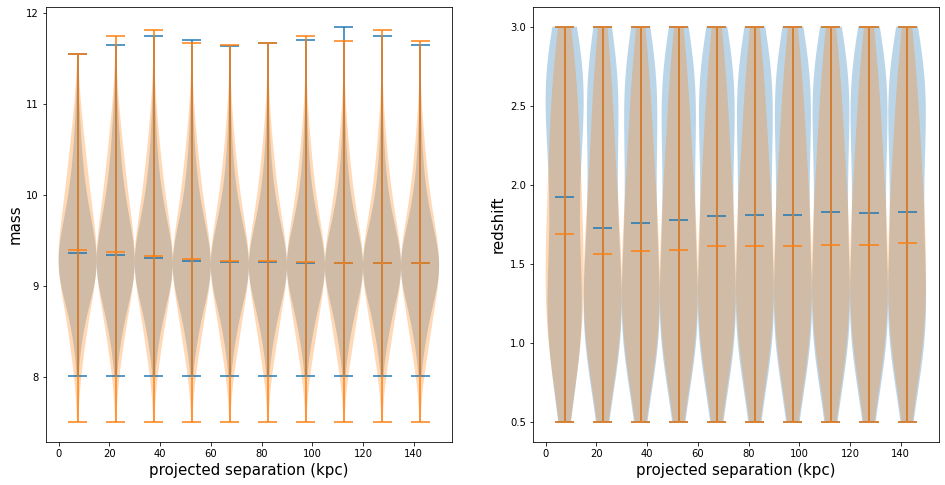

In [143]:
# make violin plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(pmass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0].violinplot(imass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=155)
axs[0].set_xlabel('projected separation (kpc)', fontsize=15)
axs[0].set_ylabel('mass', fontsize=15)

axs[1].violinplot(pz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].violinplot(iz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].axis(xmin=-5,xmax=155)
axs[1].set_xlabel('projected separation (kpc)', fontsize=15)
axs[1].set_ylabel('redshift', fontsize=15)

plt.show()

In [10]:
# look at average spec-z fraction for each bin pair and iso

# load up all catalogs (minus cos at this moment)
PATH = '/nobackup/c1029594/CANDELS_AGN_merger_data/Pair Project - Updated Data/'
fields = ['GDS','EGS','GDN','UDS']
dfs = {}
for field in fields:
    df = pd.read_csv(PATH+'CANDELS_Catalogs/CANDELS.'+field+'.1018.Lx_best.wFx_AIRD.csv')
    zspec = pd.read_csv('/nobackup/c1029594/CANDELS_AGN_merger_data/zspec_cats/'+field+'/ALL_CANDELS_zcat_'+field+'_zspec_wAIRD.csv')
    zspec.loc[zspec['ZSPEC_AIRD'] == zspec['ZBEST_AIRD'], 'G_ZSPEC'] = zspec['ZSPEC_AIRD']
    df['ZSPEC'] = zspec['G_ZSPEC']
    df = df.reindex(columns=['ID','ZSPEC'])
    df['field'] = [field]*len(df)
    dfs[field] = df

all_df = pd.concat(dfs)
all_df = all_df.reset_index(drop=True)

# stack columns based on simply ID and zspec


/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,9,11,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
def spec_bin(a_bin, pbin_ID, ibin_ID, pfield, ifield):
    pzspec_all = {}
    pzspec_all[a_bin] = []
    izspec_all = {}
    izspec_all[a_bin] = []
    spec_enh = {}
    spec_enh[a_bin] = []
    
    for i in tqdm(range(0, len(pbin_ID[a_bin])), miniters=10):
        # eh whatever just loop through
        pcount = len(pbin_ID[a_bin][i])
        zpcount = 0
        icount = len(ibin_ID[a_bin][i])
        zicount = 0
        for ID, f in zip(pbin_ID[a_bin][i], pfield[a_bin][i]):
            zspec = all_df.loc[ (all_df['ID'] == ID) & (all_df['field'] == f), 'ZSPEC'].values[0]
            if zspec > 0:
                zpcount+=1
        for ID, f in zip(ibin_ID[a_bin][i], ifield[a_bin][i]):
            zspec = all_df.loc[ (all_df['ID'] == ID) & (all_df['field'] == f), 'ZSPEC'].values[0]
            if zspec > 0:
                zicount+=1  

                
        pzspec_frac = zpcount / pcount
        izspec_frac = zicount / icount
        
        pzspec_all[a_bin].append(pzspec_frac)
        izspec_all[a_bin].append(izspec_frac)
        spec_enh[a_bin].append(pzspec_frac/izspec_frac)
        
    print('done for ', a_bin)
        
    return pzspec_all, izspec_all, spec_enh
    

In [61]:
# loop through each BIN
    # in each bin, loop through each ID entry (simultaneously with field
        # count how many of the ID's match to a spec-z

keys = list(pbin_ID.keys())

# Create a multiprocessing Pool
pool = Pool() 
all_data = pool.map(partial(spec_bin, pbin_ID=pbin_ID, ibin_ID=ibin_ID, pfield=pfield, ifield=ifield), keys)

# close pool
pool.close()
pool.join()

# pzspec_all = {}
# izspec_all = {}
# for rnge in bins:
#     pzspec_all[bins[rnge]] = []
#     izspec_all[bins[rnge]] = []
    
#     for i in tqdm(range(0, len(pbin_ID[bins[rnge]])), miniters=10):
#         # eh whatever just loop through
#         pcount = len(pbin_ID[bins[rnge]][i])
#         zpcount = 0
#         icount = len(ibin_ID[bins[rnge]][i])
#         zicount = 0
#         for ID, f in zip(pbin_ID[bins[rnge]][i], pfield[bins[rnge]][i]):
#             zspec = all_df.loc[ (all_df['ID'] == ID) & (all_df['field'] == f), 'ZSPEC'].values[0]
#             if zspec > 0:
#                 zpcount+=1
#         for ID, f in zip(ibin_ID[bins[rnge]][i], ifield[bins[rnge]][i]):
#             zspec = all_df.loc[ (all_df['ID'] == ID) & (all_df['field'] == f), 'ZSPEC'].values[0]
#             if zspec > 0:
#                 zicount+=1  

                
#         pzspec_frac = zpcount / pcount
#         izspec_frac = zicount / icount
#         pzspec_all[bins[rnge]].append(pzspec_frac)
#         izspec_all[bins[rnge]].append(izspec_frac)
        
        
#         pdf = pd.DataFrame({'ID':pbin_ID[bins[rnge]][i], 'FIELD':pfield[bins[rnge]][i]})
#         idf = pd.DataFrame({'ID':ibin_ID[bins[rnge]][i], 'FIELD':ifield[bins[rnge]][i]})
#         # go add spec-z values
#         pdf['ZSPEC'] = [-99]*len(pdf)
#         idf['ZSPEC'] = [-99]*len(idf)
#         pdf['ZSPEC'] = (all_df.loc[ (all_df['ID'] == pdf['ID']) * (all_df['field'] == pdf['FIELD']), 'ZSPEC']
        

100%|██████████| 500/500 [15:56<00:00,  1.91s/it]


done for  0.0-12.5


100%|██████████| 500/500 [29:23<00:00,  3.53s/it]


done for  12.5-25.0


100%|██████████| 500/500 [29:27<00:00,  3.53s/it]


done for  37.5-50.0


100%|██████████| 500/500 [30:28<00:00,  3.66s/it]


done for  25.0-37.5


100%|██████████| 500/500 [35:05<00:00,  4.21s/it]


done for  62.5-75.0


100%|██████████| 500/500 [35:50<00:00,  4.30s/it]


done for  50.0-62.5


100%|██████████| 500/500 [40:29<00:00,  4.86s/it]


done for  75.0-87.5


100%|██████████| 500/500 [41:03<00:00,  4.93s/it]


done for  87.5-100.0


In [62]:
# all_data[0][2]

In [63]:
for i in range(0, len(all_data)):
    if i == 0:
        pzspec_all = all_data[i][0]
        izspec_all = all_data[i][1]
        spec_enh = all_data[i][2]
    else:
        pzspec_all.update(all_data[i][0])
        izspec_all.update(all_data[i][1])
        spec_enh.update(all_data[i][2])

In [64]:
# spec_enh

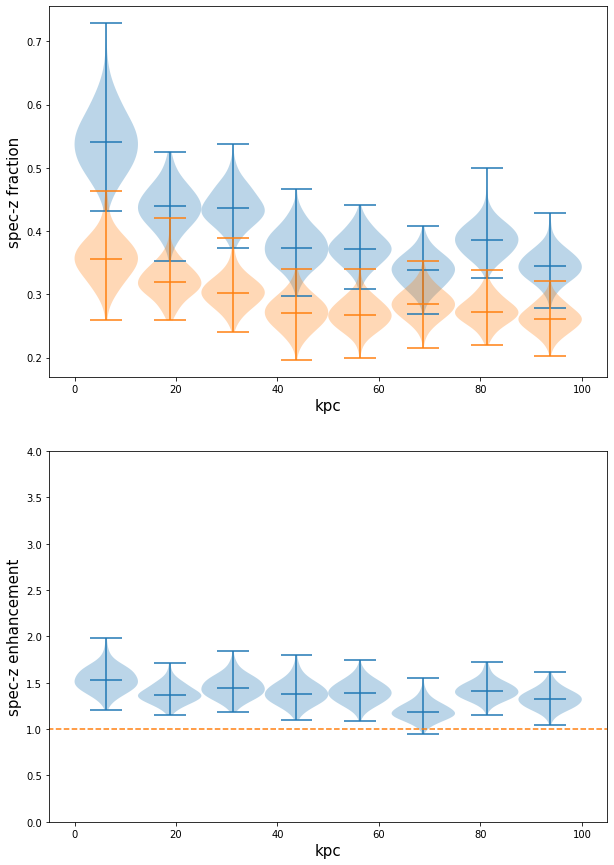

In [68]:
# plot zspec fraction differences as violin plots:
pzspec = [pzspec_all[col] for col in pzspec_all]
izspec = [izspec_all[col] for col in izspec_all]
spec_e = [spec_enh[col] for col in spec_enh]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
ax[0].violinplot(pzspec, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
ax[0].violinplot(izspec, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
ax[0].set_ylabel('spec-z fraction', fontsize=15)
ax[0].set_xlabel('kpc', fontsize=15)

ax[1].violinplot(spec_e, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
ax[1].plot([-10,110],[1,1], linestyle='--')#, color='red')
ax[1].set_ylabel('spec-z enhancement', fontsize=15)
ax[1].set_xlabel('kpc', fontsize=15)
ax[1].set_ylim(0,4)
ax[1].set_xlim(-5,105)

plt.show()

In [ ]:
# prepare for AGN vs z plot:
AGN_z = np.concatenate(AGN_z).ravel()
AGN_LX = np.concatenate(AGN_LX).ravel()

In [ ]:
# plt.hist(AGN_LX, bins=100)

In [ ]:
# it_df.loc[it_df['prime_drawn_LX'] > 0 ]
len(AGN_LX)

In [ ]:
# plot AGN vs z
fig = plt.figure(figsize=(16,10))
plt.scatter(AGN_z, AGN_LX, s=10, alpha=0.25)
plt.yscale('log')
plt.plot((0, 3.5),(10**42,10**42), color='r', linestyle='--')
plt.xlim(0.5,3.0)
plt.title('AGN mean z = ' + str(np.mean(AGN_z[np.where(AGN_LX > 10**42)])), fontsize=20)
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$L_x$', fontsize=15)
plt.show()

In [ ]:
x = np.arange(0,10,0.1)
y = statistics.normal(x, 0.3)

## Galaxy property checks

In [ ]:
# For a random single iteration, plot the distribution of mass in each bin

# photo-specz_5.csv
# data_path2 = 'photo-specz_results/q_zspec_gt_1/'
# data_path2 = 'photo-specz_results/q_zspec_ge_1_wAird/'
# data_path2 = 'photo-specz_results/q_zspec_gt_1_wAird/'
data_path2 = 'photoz_results/'


# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(COSMOS_path+'photo-specz/')))
# generate bins
max_dist = 150
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count = make_bins(max_dist=max_dist, n_bins=n_bins)

# create dictionaries to store redshift and mass distributions
bin_AGN = {}
bin_pairfrac_mass = {}
bin_isofrac_mass = {}
bin_pairfrac_z = {}
bin_isofrac_z = {}

bin_pid = {}
bin_cid = {}

it_df = pd.read_csv( data_path+data_path2+(os.listdir(data_path+data_path2))[idx] )

# it_df = pd.read_csv(data_path+'photoz_results/'+file)
it_df = it_df[ (it_df['field'] != 'GDS') & (it_df['prime_drawn_M'] > 9.5)  ]
    
# separate pairs into bins
for rnge in bins:
    # get bin ranges from bins dictionary entries
    info = bins[rnge].split('-')
    low = float(info[0])
    high = float(info[1])

    # sort into bins
    bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]

    # print(len(bin_df[ (bin_df['prime_drawn_LX'] > 42) ]) , bin_df['prime_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_drawn_LX'] > 42) ]) , bin_df['partner_drawn_LX'].count())
    # print('-----')
    # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > 42) ]), bin_df['prime_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > 42) ]), bin_df['prime_control2_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > 42) ]), bin_df['partner_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > 42) ]), bin_df['partner_control2_drawn_LX'].count())
    # print('----------------------')
    
    # get pair distributions for mass and redshift in each bin
    bin_pairfrac_mass['pair_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_M'])), axis=0 )
    bin_pairfrac_z['pair_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_z'])), axis=0 )
    bin_isofrac_mass['iso_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_M'])), axis=0 )
    bin_isofrac_z['iso_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_z'])), axis=0 )
    bin_pid['pid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_index']), 
                                                               np.array(bin_df.loc[:, 'partner_index'])), axis=0 )
    bin_cid['cid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_ID']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control1_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control2_ID'])), axis=0 )


In [ ]:
# aa = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_index'])
# print(aa)

# bb = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_control1_ID'])

# cc = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'partner_control1_ID'])
# # check for duplicate indices
# for idx in aa:
#     if idx in bb or idx in cc:
#         print('oops')

In [ ]:
pmass = [ (bin_pairfrac_mass[col]) for col in bin_pairfrac_mass]
pz = [ (bin_pairfrac_z[col]) for col in bin_pairfrac_z]
imass = [ (bin_isofrac_mass[col])[~np.isnan(bin_isofrac_mass[col])] for col in bin_isofrac_mass]
iz = [ (bin_isofrac_z[col])[~np.isnan(bin_isofrac_z[col])] for col in bin_isofrac_z]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

In [ ]:
# make violin plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(pmass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0].violinplot(imass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].set_xlabel('projected separation (kpc)')
axs[0].set_ylabel('mass')

axs[1].violinplot(pz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].violinplot(iz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].axis(xmin=-5,xmax=105)
axs[1].set_xlabel('projected separation (kpc)')
axs[1].set_ylabel('redshift')

plt.show()


## Calculate AGN fractions

In [2]:
def make_bins(max_dist=100, n_bins=10):
    
    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
    
    return all_bins

In [15]:
# create bins
max_dist = 150
n_bins = 10
bins = make_bins(max_dist=max_dist, n_bins=n_bins)

# define X-ray luminosity AGN limit
LX_AGN = 10**42
resolve = True

# create disctionaries for count and frac and store empty lists in each bin entry:
pXAGN_count, pDoAGN_count, pStAGN_count = {}, {}, {}
iXAGN_count, iDoAGN_count, iStAGN_count = {}, {}, {}
pXAGN_frac, pDoAGN_frac, pStAGN_frac = {}, {}, {}
iXAGN_frac, iDoAGN_frac, iStAGN_frac = {}, {}, {}
tot_pair = {}
tot_iso = {}

# pair and control properties
pm, pz, psig = {}, {}, {}
im, iz, isig = {}, {}, {}

for rnge in bins:
    pXAGN_count[bins[rnge]], pDoAGN_count[bins[rnge]], pStAGN_count[bins[rnge]] = [], [], []
    iXAGN_count[bins[rnge]], iDoAGN_count[bins[rnge]], iStAGN_count[bins[rnge]] = [], [], []
    pXAGN_frac[bins[rnge]], pDoAGN_frac[bins[rnge]], pStAGN_frac[bins[rnge]] = [], [], []
    iXAGN_frac[bins[rnge]], iDoAGN_frac[bins[rnge]], iStAGN_frac[bins[rnge]] = [], [], []
    tot_pair[bins[rnge]], tot_iso[bins[rnge]] = [], []
    pm[bins[rnge]], pz[bins[rnge]], psig[bins[rnge]] = [], []
    im[bins[rnge]], iz[bins[rnge]], isig[bins[rnge]] = [], []
        

# data_path2 = 'photo-specz_results/q_zspec_gt_1/'
# data_path2 = 'photo-specz_results/q_zspec_ge_1_wAird/'        # data_path+data_path2
#data_path2 = 'photo-specz_results/q_zspec_gt_1_wAird/'          # COSMOS_path+'photo-specz/kpc150/'
# data_path2 = 'photoz_results/'                                # COSMOS_path+'specz/kpc150/'
# data_path2 = 'specz_results/kpc150/'                                 # COSMOS_path+'photoz/kpc150/'
# data_path2 = 'photo-specz_results/kpc150/'                      # COSMOS_path+'photoz/kpc100/'
# data_path2 = 'photoz_results/kpc150/'
# data_path2 = 'photo-specz_results/kpc100/'   

filepath = data_path+'photoz_results/kpc150/'
# filepath = data_path+'photo-specz_results/kpc150/'

# read through all the iteration files
for file in tqdm(os.listdir(filepath), miniters=10):
    it_df = pd.read_csv(filepath+file)
    it_df = it_df[ (it_df['prime_drawn_M'] > 9) & (it_df['prime_drawn_z'] < 3) ]#& (it_df['field'] != 'COS') ]
               #(it_df['field'] != 'COS') ] #(it_df['mass_ratio'] >= 0.40)]
        
    # create AGN columns to fill with 1 or 0
    it_df['pXAGN_PR'], it_df['pXAGN_PA'] = [0]*len(it_df), [0]*len(it_df)
    it_df['iXAGN_PR1'], it_df['iXAGN_PR2'], it_df['iXAGN_PA1'], it_df['iXAGN_PA2'] = [0]*len(it_df), [0]*len(it_df), [0]*len(it_df), [0]*len(it_df)

    it_df['pDoAGN_PR'], it_df['pDoAGN_PA'] = [0]*len(it_df),  [0]*len(it_df)
    it_df['iDoAGN_PR1'], it_df['iDoAGN_PR2'], it_df['iDoAGN_PA1'], it_df['iDoAGN_PA2'] = [0]*len(it_df), [0]*len(it_df), [0]*len(it_df), [0]*len(it_df)

    it_df['pStAGN_PR'], it_df['pStAGN_PA'] = [0]*len(it_df), [0]*len(it_df)
    it_df['iStAGN_PR1'], it_df['iStAGN_PR2'], it_df['iStAGN_PA1'], it_df['iStAGN_PA2'] = [0]*len(it_df), [0]*len(it_df), [0]*len(it_df), [0]*len(it_df)
    
    # count AGN, a bit ugly, but easiest way incorporate duplicate resolution
    it_df.loc[ it_df['prime_drawn_LX'] > LX_AGN, 'pXAGN_PR' ] = 1
    it_df.loc[ it_df['partner_drawn_LX'] > LX_AGN, 'pXAGN_PA' ] = 1
    it_df.loc[ it_df['prime_control1_drawn_LX'] > LX_AGN, 'iXAGN_PR1' ] = 1
    it_df.loc[ it_df['prime_control2_drawn_LX'] > LX_AGN, 'iXAGN_PR2' ] = 1
    it_df.loc[ it_df['partner_control1_drawn_LX'] > LX_AGN, 'iXAGN_PA1' ] = 1
    it_df.loc[ it_df['partner_control2_drawn_LX'] > LX_AGN, 'iXAGN_PA2' ] = 1
    
    it_df.loc[ it_df['prime_IR_AGN_DON'] == 1, 'pDoAGN_PR' ] = 1
    it_df.loc[ it_df['partner_IR_AGN_DON'] == 1, 'pDoAGN_PA' ] = 1
    it_df.loc[ it_df['prime_control1_IR_AGN_DON'] == 1, 'iDoAGN_PR1' ] = 1
    it_df.loc[ it_df['prime_control2_IR_AGN_DON'] == 1, 'iDoAGN_PR2' ] = 1
    it_df.loc[ it_df['partner_control1_IR_AGN_DON'] == 1, 'iDoAGN_PA1' ] = 1
    it_df.loc[ it_df['partner_control2_IR_AGN_DON'] == 1, 'iDoAGN_PA2' ] = 1
    
    it_df.loc[ it_df['prime_IR_AGN_STR'] == 1, 'pStAGN_PR' ] = 1
    it_df.loc[ it_df['partner_IR_AGN_STR'] == 1, 'pStAGN_PA' ] = 1
    it_df.loc[ it_df['prime_control1_IR_AGN_STR'] == 1, 'iStAGN_PR1' ] = 1
    it_df.loc[ it_df['prime_control2_IR_AGN_STR'] == 1, 'iStAGN_PR2' ] = 1
    it_df.loc[ it_df['partner_control1_IR_AGN_STR'] == 1, 'iStAGN_PA1' ] = 1
    it_df.loc[ it_df['partner_control2_IR_AGN_STR'] == 1, 'iStAGN_PA2' ] = 1
    
    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])
        
        # sort into bins
        bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]
        
        if resolve == True: # switch for resolving duplicates, currently only works for pair, not control sample...
            bin_XAGN, bin_DoAGN, bin_StAGN = [], [], []
            bin_m, bin_z, bin_sig = [], [], []
            for field in bin_df['field'].unique():
                all_idx = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'prime_index'], 
                                           bin_df.loc[bin_df['field'] == field, 'partner_index']) )
                all_XAGN = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'pXAGN_PR'], 
                                            bin_df.loc[bin_df['field'] == field, 'pXAGN_PA']) )
                all_DoAGN = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'pDoAGN_PR'], 
                                             bin_df.loc[bin_df['field'] == field, 'pDoAGN_PA']) )
                all_StAGN = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'pStAGN_PR'], 
                                             bin_df.loc[bin_df['field'] == field, 'pStAGN_PA']) )
                all_m = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'prime_drawn_M'], 
                                           bin_df.loc[bin_df['field'] == field, 'partner_drawn_M']) )
                all_z = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'prime_drawn_z'], 
                                           bin_df.loc[bin_df['field'] == field, 'partner_drawn_z']) )
                all_sig = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'prime_2sigma'], 
                                           bin_df.loc[bin_df['field'] == field, 'partner_2sigma']) )
                
                # sort out duplicates
                unq_id, sort_idx, counts = np.unique(all_idx, return_index=True, return_counts=True)
                
                sort_XAGN = all_XAGN[sort_idx]
                sort_DoAGN = all_DoAGN[sort_idx]
                sort_StAGN = all_StAGN[sort_idx]
                sort_m = all_m[sort_idx]
                sort_z = all_z[sort_idx]
                sort_sig = all_sig[sort_idx]
                bin_XAGN.append(sort_XAGN) # get out of just this field
                bin_DoAGN.append(sort_DoAGN)
                bin_StAGN.append(sort_StAGN)
                bin_m.append(sort_m)
                bin_z.append(sort_z)
                bin_sig.append(sort_sig)
        
            bin_XAGN = np.concatenate( bin_XAGN )         # think more about why I didn't need to do this in pam
            bin_DoAGN = np.concatenate( bin_DoAGN )
            bin_StAGN = np.concatenate( bin_StAGN )
            bin_m = np.concatenate( bin_m )
            bin_z = np.concatenate( bin_z )
            bin_sig = np.concatenate( bin_sig )
            # store counts for table
            pXAGN_count[bins[rnge]].append( np.sum(bin_XAGN) )
            pDoAGN_count[bins[rnge]].append( np.sum(bin_DoAGN) )
            pStAGN_count[bins[rnge]].append( np.sum(bin_StAGN) )
            
            # calculate AGN fractions
            pXAGN_frac[bins[rnge]].append( np.sum(bin_XAGN) / len(bin_XAGN) )
            pDoAGN_frac[bins[rnge]].append( np.sum(bin_DoAGN) / len(bin_DoAGN) )
            pStAGN_frac[bins[rnge]].append( np.sum(bin_StAGN) / len(bin_StAGN) )
            
            # store total counts as well
            tot_pair[bins[rnge]].append( len(bin_XAGN) ) # same for all
            # repeating for iso sample will need some thought, probably just need to make a wider np array
            
            # store mass and z distributions for each bin
            pm[bins[rnge]].append(bin_m)
            pz[bins[rnge]].append(bin_z)
            psig[bins[rnge]].append(bin_sig)
            
        else:
            all_XAGN = np.concatenate( (bin_df['pXAGN_PR'], bin_df['pXAGN_PA']) )
            all_DoAGN = np.concatenate( (bin_df['pDoAGN_PR'], bin_df['pDoAGN_PA']) )
            all_StAGN = np.concatenate( (bin_df['pStAGN_PR'], bin_df['pStAGN_PA']) )
            all_m = np.concatenate( (bin_df['prime_drawn_M'], bin_df['partner_drawn_M']) )
            all_z = np.concatenate( (bin_df['prime_drawn_z'], bin_df['partner_drawn_z']) )
            all_sig = np.concatenate( (bin_df.loc[bin_df['field'] == field, 'prime_2sigma'], 
                                           bin_df.loc[bin_df['field'] == field, 'partner_2sigma']) )
            
            # store counts for table
            pXAGN_count[bins[rnge]].append( np.sum(all_XAGN) )
            pDoAGN_count[bins[rnge]].append( np.sum(all_DoAGN) )
            pStAGN_count[bins[rnge]].append( np.sum(all_StAGN) )
            
            # calculate AGN fractions
            pXAGN_frac[bins[rnge]].append( np.sum(all_XAGN) / len(all_XAGN) )
            pDoAGN_frac[bins[rnge]].append( np.sum(all_DoAGN) / len(all_DoAGN) )
            pStAGN_frac[bins[rnge]].append( np.sum(all_StAGN) / len(all_StAGN) )
            
            # store total counts as well
            tot_pair[bins[rnge]].append( len(all_XAGN) ) # same for all
            # repeating for iso sample will need some thought, probably just need to make a wider np array
            
            # store mass and z distributions for each bin
            pm[bins[rnge]].append(all_m)
            pz[bins[rnge]].append(all_z)
            psig[bins[rnge]].append(all_sig)
            
# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

# define violin plot width
vwidth = float((bins['0'].split('-'))[1]) - float((bins['0'].split('-'))[0])
        

100%|██████████| 500/500 [02:39<00:00,  3.13it/s]


In [16]:
# it_df[['prime_drawn_z','prime_control1_drawn_z', 'prime_control2_drawn_z', 'partner_drawn_z', 'partner_control1_drawn_z',
#        'partner_control2_drawn_z']]
# it_df

In [17]:
# plot distributions of mass and z for each bin...
# # ravel the dictionaries:
for rnge in bins:
    pz[bins[rnge]] = np.concatenate(pz[bins[rnge]]).ravel()
    pm[bins[rnge]] = np.concatenate(pm[bins[rnge]]).ravel()
    psig[bins[rnge]] = np.concatenate(psig[bins[rnge]]).ravel()

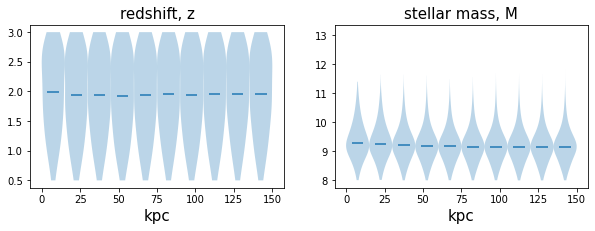

In [18]:
# prepare data for violin plot
# SHOULD ALSO INCLUDE PDF WIDTH, WOULD NEED TO TAKE ID'S AND MATCH TO WIDTH CATALOG

pz_dist = [pz[key] for key in pz]
pm_dist = [pm[key] for key in pm]
psig_dist = [psig[key] for key in psig]
# plot distributions
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

ax[0].violinplot(pz_dist, kpc_meds, points=100, widths=vwidth, showmeans=False,
                 showextrema=False, showmedians=True, bw_method=0.5)
ax[0].set_xlabel('kpc', fontsize=15)
ax[0].set_title('redshift, z', fontsize=15)

ax[1].violinplot(pm_dist, kpc_meds, points=100, widths=vwidth, showmeans=False,
                 showextrema=False, showmedians=True, bw_method=0.5)
ax[1].set_xlabel('kpc', fontsize=15)
ax[1].set_title('stellar mass, M', fontsize=15)

ax[2].violinplot(psig_dist, kpc_meds, points=100, widths=vwidth, showmeans=False,
                 showextrema=False, showmedians=True, bw_method=0.5)
ax[2].set_xlabel('kpc', fontsize=15)
ax[2].set_title('PDF width, 2$\sigma$', fontsize=15)

plt.show()

In [19]:
# create dataframes from the dictionaries:
pXAGN_df = pd.DataFrame.from_dict(pXAGN_frac)
pDoAGN_df = pd.DataFrame.from_dict(pDoAGN_frac)
pStAGN_df = pd.DataFrame.from_dict(pStAGN_frac)
pDoAGN_df.describe()

# iXAGN_df = pd.DataFrame.from_dict(iXAGN_frac)
# iDoAGN_df = pd.DataFrame.from_dict(iDoAGN_frac)
# iStAGN_df = pd.DataFrame.from_dict(iStAGN_frac)

,0.0-15.0,15.0-30.0,30.0-45.0,45.0-60.0,60.0-75.0,75.0-90.0,90.0-105.0,105.0-120.0,120.0-135.0,135.0-150.0
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.015082,0.005978,0.004419,0.007215,0.004679,0.004416,0.004315,0.004489,0.004340,0.004663
std,0.005384,0.002170,0.001710,0.001848,0.001419,0.001204,0.001098,0.001077,0.000981,0.000962
min,0.002193,0.000920,0.000684,0.001212,0.001395,0.000772,0.001471,0.001296,0.001183,0.002089
25%,0.011331,0.004530,0.003418,0.005998,0.003719,0.003606,0.003617,0.003757,0.003691,0.003971
50%,0.014894,0.005666,0.004292,0.007232,0.004663,0.004383,0.004267,0.004403,0.004361,0.004719
75%,0.018735,0.007355,0.005626,0.008400,0.005544,0.005217,0.005054,0.005300,0.004981,0.005270
max,0.032468,0.013562,0.009510,0.012143,0.010400,0.008010,0.008718,0.008192,0.007425,0.007435


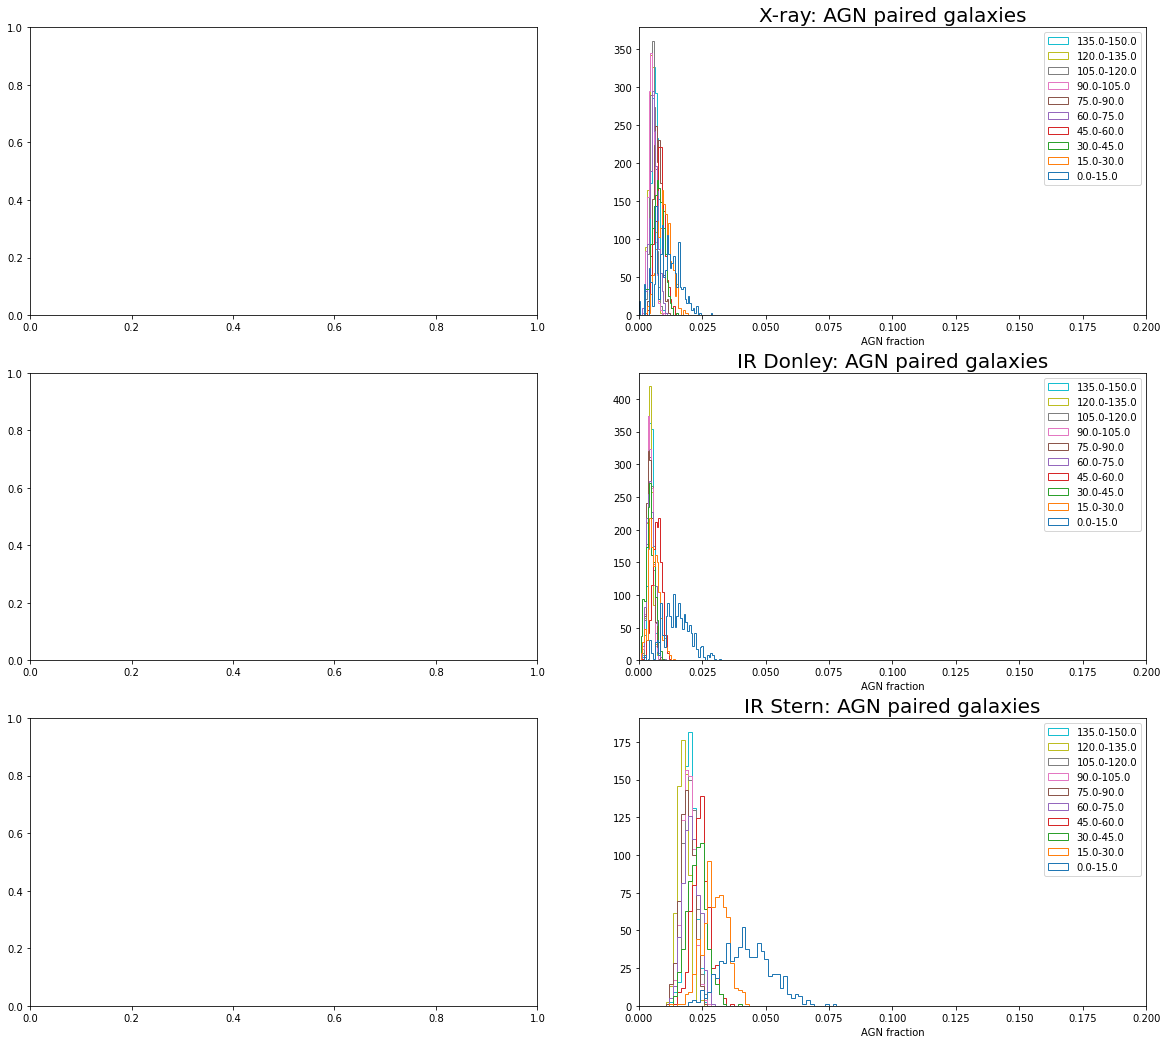

In [20]:
# plot distributions
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
# ax[0,0].hist([iAGNf_df[col] for col in iAGNf_df], bins=45, histtype='step', density=True, label=[col for col in iAGNf_df])
# ax[0,0].legend()
# ax[0,0].set_xlim(0,0.2)
# ax[0,0].set_xlabel('AGN fraction')
# ax[0,0].set_title('X-ray: AGN isolated galaxies', fontsize=20)

ax[0,1].hist([pXAGN_df[col] for col in pXAGN_df], bins=45, histtype='step', density=True, label=[col for col in pXAGN_df])
ax[0,1].legend()
ax[0,1].set_xlim(0,0.2)
ax[0,1].set_xlabel('AGN fraction')
ax[0,1].set_title('X-ray: AGN paired galaxies', fontsize=20)

# ax[1,0].hist([iDON_AGN_df[col] for col in iDON_AGN_df], bins=45, histtype='step', density=True, label=[col for col in iDON_AGN_df])
# ax[1,0].legend()
# ax[1,0].set_xlim(0,0.2)
# ax[1,0].set_xlabel('AGN fraction')
# ax[1,0].set_title('IR Donley: AGN isolated galaxies', fontsize=20)

ax[1,1].hist([pDoAGN_df[col] for col in pDoAGN_df], bins=45, histtype='step', density=True, label=[col for col in pDoAGN_df])
ax[1,1].legend()
ax[1,1].set_xlim(0,0.2)
ax[1,1].set_xlabel('AGN fraction')
ax[1,1].set_title('IR Donley: AGN paired galaxies', fontsize=20)

# ax[2,0].hist([iSTR_AGN_df[col] for col in iSTR_AGN_df], bins=45, histtype='step', density=True, label=[col for col in iDON_AGN_df])
# ax[2,0].legend()
# ax[2,0].set_xlim(0,0.2)
# ax[2,0].set_xlabel('AGN fraction')
# ax[2,0].set_title('IR Stern: AGN isolated galaxies', fontsize=20)

ax[2,1].hist([pStAGN_df[col] for col in pStAGN_df], bins=45, histtype='step', density=True, label=[col for col in pStAGN_df])
ax[2,1].legend()
ax[2,1].set_xlim(0,0.2)
ax[2,1].set_xlabel('AGN fraction')
ax[2,1].set_title('IR Stern: AGN paired galaxies', fontsize=20)

plt.show()

In [21]:
# make AGN fraction vectors
pXAGN_fracs = [pXAGN_df[col] for col in pXAGN_df]
# iXAGN_fracs = [iXAGN_df[col] for col in iXAGN_df]

pDoAGN_fracs = [pDoAGN_df[col] for col in pDoAGN_df]

pStAGN_fracs = [pStAGN_df[col] for col in pStAGN_df]


# make an AGN enhancment vector
# quick way to get rid of dividing by 0 issue, will need to address later

# for j in range(0,len(idata)):
#     for k in range(0, len(idata[j])):
#         if idata[j][k] == 0:
#             idata[j][k] = 1000
            
# for j in range(0,len(idata)):             ### POTENTIALL ALSO INEFFICIENT ###
#     for k in range(0, len(idata[j])):
#         if idata[j][k] == 1000:            
#             idata[j][k] = min(idata[j])
#             print('here')
            
# for j in range(0,len(iDONdata)):
#     for k in range(0, len(iDONdata[j])):
#         if iDONdata[j][k] == 0:
#             iDONdata[j][k] = 1000
            
# for j in range(0,len(iDONdata)):
#     for k in range(0, len(iDONdata[j])):
#         if iDONdata[j][k] == 1000:            
#             iDONdata[j][k] = min(iDONdata[j])
#             print('here')
            
# for j in range(0,len(iSTRdata)):
#     for k in range(0, len(iSTRdata[j])):
#         if iSTRdata[j][k] == 0:
#             iSTRdata[j][k] = 1000
            
# for j in range(0,len(iSTRdata)):
#     for k in range(0, len(iSTRdata[j])):
#         if iSTRdata[j][k] == 1000:            
#             iSTRdata[j][k] = min(iSTRdata[j])
#             print('here')
        
# AGN_enh = [(pdata[i] / idata[i]) for i in range(0, len(pdata))]
# DONAGN_enh = [(pDONdata[i] / iDONdata[i]) for i in range(0, len(pDONdata))]
# STRAGN_enh = [(pSTRdata[i] / iSTRdata[i]) for i in range(0, len(pSTRdata))]


In [22]:
# show average out counts from the bins and output as a simple df
pXAGN_count2 = pXAGN_count.copy()
pDoAGN_count2 = pDoAGN_count.copy()
pStAGN_count2 = pStAGN_count.copy()
tot_pair2 = tot_pair.copy()

for rnge in bins:
    pXAGN_count2[bins[rnge]] = [np.mean(pXAGN_count2[bins[rnge]])] # these get rewritten so be careful
    pDoAGN_count2[bins[rnge]] = [np.mean(pDoAGN_count2[bins[rnge]])]
    pStAGN_count2[bins[rnge]] = [np.mean(pStAGN_count2[bins[rnge]])]
    tot_pair2[bins[rnge]] = [np.mean(tot_pair2[bins[rnge]])]

pXAGN_count_df = pd.DataFrame.from_dict(pXAGN_count2)
pDoAGN_count_df = pd.DataFrame.from_dict(pDoAGN_count2)
pStAGN_count_df = pd.DataFrame.from_dict(pStAGN_count2)
ptot_count_df = pd.DataFrame.from_dict(tot_pair2)

df = pd.concat([ptot_count_df,pXAGN_count_df, pDoAGN_count_df, pStAGN_count_df], ignore_index = True, axis=0)
df = df.rename(index={0: 'Mean Paired Gals', 1: 'Mean Paired X-ray AGN', 2: 'Mean Paired Donley AGN', 3: 'Mean Paired Stern AGN'})
df

# bin_gal_count_copy = bin_gal_count.copy()
# for rnge in bins:
#     bin_AGN_count[str(bins[rnge])] = [np.mean(bin_AGN_count[str(bins[rnge])])]
#     bin_gal_count[str(bins[rnge])] = [np.mean(bin_gal_count[str(bins[rnge])])]
#     bin_isoAGN_count[str(bins[rnge])] = [np.mean(bin_isoAGN_count[str(bins[rnge])])]
#     bin_isogal_count[str(bins[rnge])] = [np.mean(bin_isogal_count[str(bins[rnge])])]
    
#     # also for the IR AGN
#     pDON_AGN_count[bins[rnge]] = [np.mean(pDON_AGN_count[bins[rnge]])]
#     iDON_AGN_count[bins[rnge]] = [np.mean(iDON_AGN_count[bins[rnge]])]
#     pSTR_AGN_count[bins[rnge]] = [np.mean(pSTR_AGN_count[bins[rnge]])]
#     iSTR_AGN_count[bins[rnge]] = [np.mean(iSTR_AGN_count[bins[rnge]])]
    
# AGN_count_df = pd.DataFrame.from_dict(bin_AGN_count)
# gal_count_df = pd.DataFrame.from_dict(bin_gal_count)
# isoAGN_count_df = pd.DataFrame.from_dict(bin_isoAGN_count)
# isogal_count_df = pd.DataFrame.from_dict(bin_isogal_count)

# pDON_count_df = pd.DataFrame.from_dict(pDON_AGN_count)
# iDON_count_df = pd.DataFrame.from_dict(iDON_AGN_count) 
# pSTR_count_df = pd.DataFrame.from_dict(pSTR_AGN_count)
# iSTR_count_df = pd.DataFrame.from_dict(iSTR_AGN_count) 

# df = pd.concat([gal_count_df,AGN_count_df, pDON_count_df, pSTR_count_df,
#                isogal_count_df, isoAGN_count_df, iDON_count_df, iSTR_count_df], ignore_index = True, axis=0)

# df = df.rename(index={0: 'Mean Paired Gals', 1: 'Mean Paired X-ray AGN', 2: 'Mean Paired IR Don AGN', 3: 'Mean Paired IR Str AGN',
#                 4: 'Mean Iso Gals', 5: 'Mean Iso X-ray AGN', 6: 'Mean Iso IR Don AGN', 7: 'Mean Iso ID Str AGN'})
# df


,0.0-15.0,15.0-30.0,30.0-45.0,45.0-60.0,60.0-75.0,75.0-90.0,90.0-105.0,105.0-120.0,120.0-135.0,135.0-150.0
Mean Paired Gals,444.008,1085.624,1398.278,1750.336,2079.544,2442.280,2767.352,3159.988,3522.308,3850.710
Mean Paired X-ray AGN,4.970,10.730,10.714,14.368,12.336,17.600,13.852,17.414,17.792,24.422
Mean Paired Donley AGN,6.694,6.498,6.170,12.626,9.732,10.784,11.942,14.192,15.290,17.958
Mean Paired Stern AGN,19.100,32.458,32.038,42.518,42.744,46.526,53.768,63.376,61.714,77.484


In [23]:
def binomial_err(c, k, n):
    p_lower = dist.beta.ppf((1-c)/2., k+1, n-k+1)
    p_upper = dist.beta.ppf(1-(1-c)/2., k+1, n-k+1)
    return p_lower, p_upper

In [24]:
# calculate 95% binomial confidence intervals based on average AGN fracs and counts
# THINK SHOULD I PROPOGATE ERROS ITERATIVELY INSTEAD OF CACLUATING THEM FROM THE MEAN???
c = 0.683 #(1 sigma)
pX_up, pX_lo, pX_fr = {}, {}, {}         # upper lower and fraction
pDo_up, pDo_lo, pDo_fr = {}, {}, {}      # still gotta do controls ...
pSt_up, pSt_lo, pSt_fr = {}, {}, {}  

# loop through each col of df above:
for col in df.columns:
    p_n = df[col].loc['Mean Paired Gals']
    # n_iso = df[col].loc['Mean Iso Gals']
    # X-ray first
    k_pX = df[col].loc['Mean Paired X-ray AGN']
    pX_lo0, pX_up0 = binomial_err(c, k_pX, p_n)
    pX_lo[col] = (k_pX/p_n) - pX_lo0
    pX_up[col] = pX_up0 - (k_pX/p_n)
    pX_fr[col] = (k_pX/p_n)
    # k_XRAY_ISO = df[col].loc['Mean Iso X-ray AGN']
    # plXRAY_ISO, puXRAY_ISO = binomial_err(c, k_XRAY_ISO, n_ISO)
    # lXRAY_ISO[col] = (k_XRAY_ISO/n_ISO) - plXRAY_ISO
    # uXRAY_ISO[col] = puXRAY_ISO - (k_XRAY_ISO/n_ISO)
    # mXRAY_ISO[col] =  (k_XRAY_ISO/n_ISO)
    
    # DONLEY IR
    k_pDo = df[col].loc['Mean Paired Donley AGN']
    pDo_lo0, pDo_up0 = binomial_err(c, k_pDo, p_n)
    pDo_lo[col] = (k_pDo/p_n) - pDo_lo0
    pDo_up[col] = pDo_up0 - (k_pDo/p_n)
    pDo_fr[col] = (k_pDo/p_n)
    # k_DON_ISO = df[col].loc['Mean Iso IR Don AGN']
    # plDON_ISO, puDON_ISO = binomial_err(c, k_DON_ISO, n_ISO)
    # lDON_ISO[col] = (k_DON_ISO/n_ISO) - plDON_ISO
    # uDON_ISO[col] = puDON_ISO - (k_DON_ISO/n_ISO)
    # mDON_ISO[col] = (k_DON_ISO/n_ISO)
    
    # Stern IR
    k_pSt = df[col].loc['Mean Paired Stern AGN']
    pSt_lo0, pSt_up0 = binomial_err(c, k_pSt, p_n)
    pSt_lo[col] = (k_pSt/p_n) - pSt_lo0
    pSt_up[col] = pSt_up0 - (k_pSt/p_n)
    pSt_fr[col] = (k_pSt/p_n)
    
# propagate errors:
# AGN_enh_err = AGN_enh_avg * np.sqrt( (pAGN_err/pdata_avg)**2 + (iAGN_err/idata_avg)**2 )

In [25]:
# prepare for violin plots
pX_uerr = [pX_up[col] for col in pX_up]
pX_lerr = [pX_lo[col] for col in pX_lo]
pX_fr = [pX_fr[col] for col in pX_fr]   # beware overwriting

pDo_uerr = [pDo_up[col] for col in pDo_up]
pDo_lerr = [pDo_lo[col] for col in pDo_lo]
pDo_fr = [pDo_fr[col] for col in pDo_fr]

pSt_uerr = [pSt_up[col] for col in pSt_up]
pSt_lerr = [pSt_lo[col] for col in pSt_lo]
pSt_fr = [pSt_fr[col] for col in pSt_fr]

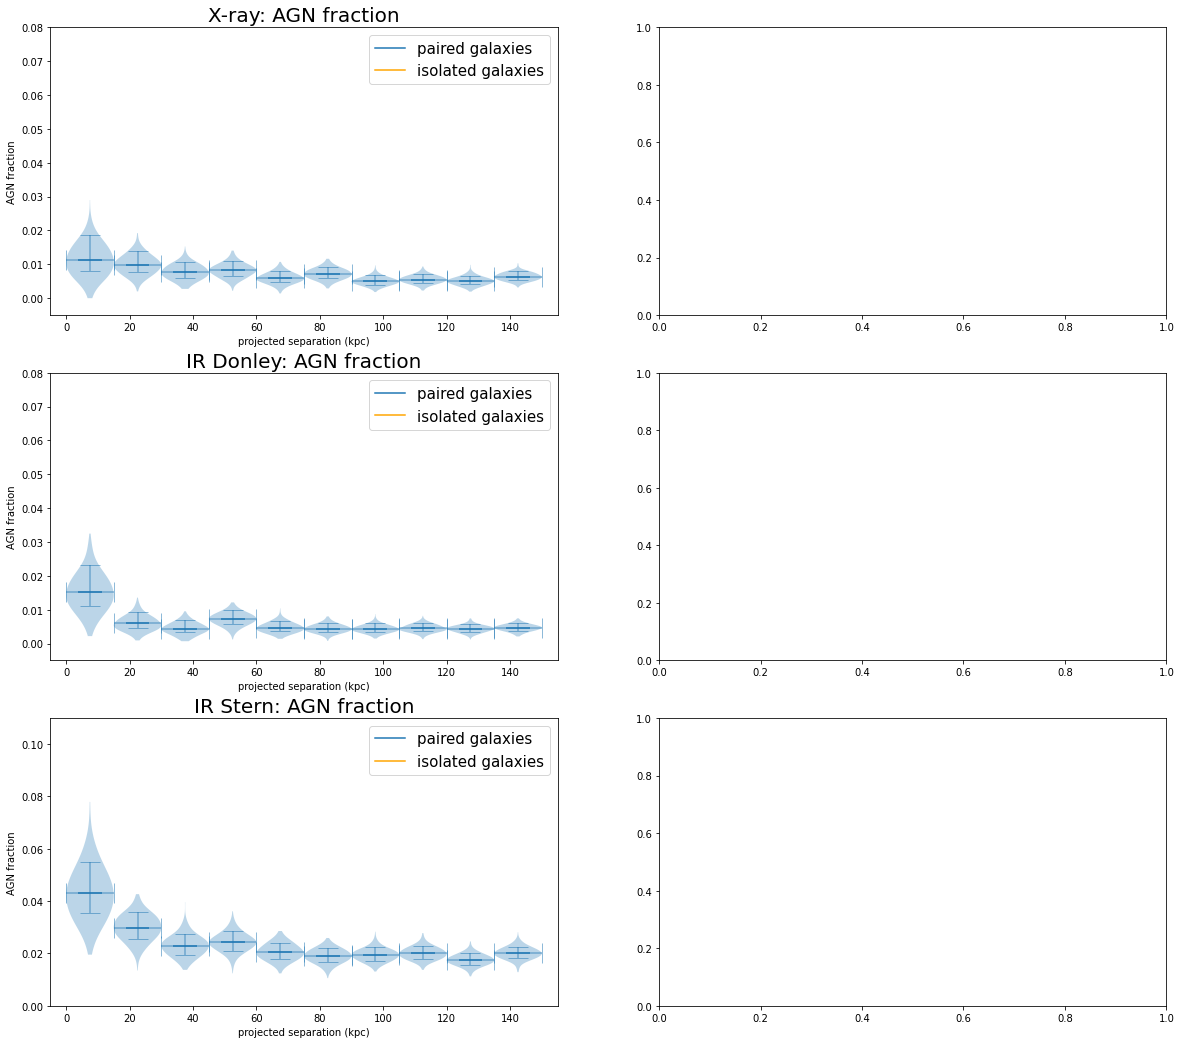

In [26]:
# make violin plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
axs[0,0].violinplot(pXAGN_fracs, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[0,0].errorbar(kpc_meds, pX_fr, yerr=(pX_lerr, pX_uerr), xerr=vwidth/2, linestyle="None", color='#1f77b4', 
                  capsize=10, alpha=0.5)
# axs[0,0].violinplot(idata, kpc_meds, points=100, widths=vwidth, showmeans=False,
#                      showextrema=False, showmedians=False, bw_method=0.5)
# axs[0,0].errorbar(kpc_meds, idata_m, yerr=(idata_lerr, idata_uerr), xerr=vwidth/2, linestyle="None", color='#ff7f0e', 
#                   capsize=10, alpha=0.5)
axs[0,0].axis(xmin=-5,xmax=155)
axs[0,0].axis(ymin=-0.005, ymax=0.08)
axs[0,0].set_xlabel('projected separation (kpc)', fontsize=10)
axs[0,0].set_ylabel('AGN fraction', fontsize=10)
axs[0,0].plot([-10,-10], color='#1f77b4', label='paired galaxies')
axs[0,0].plot([-10,-10], color='orange', label='isolated galaxies')
axs[0,0].legend(fontsize=15)
axs[0,0].set_title('X-ray: AGN fraction', fontsize=20)
# axs[0,1].violinplot(AGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=False,
#                      showextrema=False, showmedians=True, bw_method=0.5)
# axs[0,1].errorbar(kpc_meds, AGN_enh_avg, yerr=AGN_enh_err, linestyle="None", color='#1f77b4', capsize=10)
# axs[0,1].plot([-5,155], [1,1], linestyle='--')
# axs[0,1].axis(xmin=-5,xmax=155)
# axs[0,1].axis(ymin=0, ymax=4)
# axs[0,1].set_xlabel('projected separation (kpc)', fontsize=10)
# axs[0,1].set_ylabel('AGN enhancement', fontsize=10)
# axs[0,1].set_title('X-ray: AGN enhancement', fontsize=20)


axs[1,0].violinplot(pDoAGN_fracs, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[1,0].errorbar(kpc_meds, pDo_fr, yerr=(pDo_lerr, pDo_uerr), xerr=vwidth/2, linestyle="None", color='#1f77b4', 
                  capsize=10, alpha=0.5)
# axs[1,0].violinplot(iDONdata, kpc_meds, points=100, widths=vwidth, showmeans=False,
#                      showextrema=False, showmedians=False, bw_method=0.5)
# axs[1,0].errorbar(kpc_meds, iDON_m, yerr=(iDON_lerr,iDON_uerr), xerr=vwidth/2, linestyle="None", color='#ff7f0e', 
#                   capsize=10, alpha=0.5)
axs[1,0].axis(xmin=-5,xmax=155)
axs[1,0].axis(ymin=-0.005, ymax=0.08)
axs[1,0].set_xlabel('projected separation (kpc)', fontsize=10)
axs[1,0].set_ylabel('AGN fraction', fontsize=10)
axs[1,0].plot([-10,-10], color='#1f77b4', label='paired galaxies')
axs[1,0].plot([-10,-10], color='orange', label='isolated galaxies')
axs[1,0].legend(fontsize=15)
axs[1,0].set_title('IR Donley: AGN fraction', fontsize=20)

# axs[1,1].violinplot(DONAGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=False,
#                      showextrema=False, showmedians=True, bw_method=0.5)
# # axs[1,1].errorbar(kpc_meds, AGN_enh_avg, yerr=AGN_enh_err, linestyle="None", color='#1f77b4', capsize=10)
# axs[1,1].plot([-5,155], [1,1], linestyle='--')
# axs[1,1].axis(xmin=-5,xmax=155)
# axs[1,1].axis(ymin=0, ymax=4)
# axs[1,1].set_xlabel('projected separation (kpc)', fontsize=10)
# axs[1,1].set_ylabel('AGN enhancement', fontsize=10)
# axs[1,1].set_title('IR Donley: AGN fraction', fontsize=20)

axs[2,0].violinplot(pStAGN_fracs, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[2,0].errorbar(kpc_meds, pSt_fr, yerr=(pSt_lerr, pSt_uerr), xerr=vwidth/2, linestyle="None", color='#1f77b4', 
                  capsize=10, alpha=0.5)
# axs[2,0].violinplot(iSTRdata, kpc_meds, points=100, widths=vwidth, showmeans=False,
#                      showextrema=False, showmedians=True, bw_method=0.5)
# axs[2,0].errorbar(kpc_meds, idata_avg, yerr=iAGN_err, linestyle="None", color='#ff7f0e', capsize=10)
axs[2,0].axis(xmin=-5,xmax=155)
axs[2,0].axis(ymin=0, ymax=0.11)
axs[2,0].set_xlabel('projected separation (kpc)', fontsize=10)
axs[2,0].set_ylabel('AGN fraction', fontsize=10)
axs[2,0].plot([-10,-10], color='#1f77b4', label='paired galaxies')
axs[2,0].plot([-10,-10], color='orange', label='isolated galaxies')
axs[2,0].legend(fontsize=15)
axs[2,0].set_title('IR Stern: AGN fraction', fontsize=20)

# axs[2,1].violinplot(STRAGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=False,
#                      showextrema=False, showmedians=True, bw_method=0.5)
# # axs[2,1].errorbar(kpc_meds, AGN_enh_avg, yerr=AGN_enh_err, linestyle="None", color='#1f77b4', capsize=10)
# axs[2,1].plot([-5,155], [1,1], linestyle='--')
# axs[2,1].axis(xmin=-5,xmax=155)
# axs[2,1].axis(ymin=0, ymax=4)
# axs[2,1].set_xlabel('projected separation (kpc)', fontsize=10)
# axs[2,1].set_ylabel('AGN enhancement', fontsize=10)
# axs[2,1].set_title('IR Stern: AGN fraction', fontsize=20)


plt.show()

In [27]:
# propogate erros:
# pdata_uerr = [uXRAY_PAIR[col] for col in uXRAY_PAIR]
# pdata_lerr = [lXRAY_PAIR[col] for col in lXRAY_PAIR]
# pdata_m = [mXRAY_PAIR[col] for col in mXRAY_PAIR] #mean frac
# idata_uerr = [uXRAY_ISO[col] for col in uXRAY_ISO]
# idata_lerr = [lXRAY_ISO[col] for col in lXRAY_ISO]
# idata_m = [mXRAY_ISO[col] for col in mXRAY_ISO]

# pDON_uerr = [uDON_PAIR[col] for col in uDON_PAIR]
# pDON_lerr =  [lDON_PAIR[col] for col in lDON_PAIR]
# pDON_m = [mDON_PAIR[col] for col in mDON_PAIR]
# iDON_uerr = [uDON_ISO[col] for col in uDON_ISO]
# iDON_lerr =  [lDON_ISO[col] for col in lDON_ISO]
# iDON_m = [mDON_ISO[col] for col in mDON_ISO]

AGN_enh_m = np.mean(AGN_enh, axis=1)
DONAGN_enh_m = np.mean(DONAGN_enh, axis=1)

uXenh = AGN_enh_m * np.sqrt( (np.array(pdata_uerr)/np.array(pdata_m))**2 + (np.array(idata_uerr)/np.array(idata_m))**2 )
lXenh = AGN_enh_m * np.sqrt( (np.array(pdata_lerr)/np.array(pdata_m))**2 + (np.array(idata_lerr)/np.array(idata_m))**2 )

uDONenh = DONAGN_enh_m * np.sqrt( (np.array(pDON_uerr)/np.array(pDON_m))**2 + (np.array(iDON_uerr)/np.array(iDON_m))**2 )
lDONenh = DONAGN_enh_m * np.sqrt( (np.array(pDON_lerr)/np.array(pDON_m))**2 + (np.array(iDON_lerr)/np.array(iDON_m))**2 )

NameError: name 'AGN_enh' is not defined

In [ ]:
# make violin plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)
fig.subplots_adjust(wspace=0)

axs[0].violinplot(AGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[0].errorbar(kpc_meds, AGN_enh_m, yerr=(lXenh, uXenh), linestyle="None", color='#1f77b4', 
                  capsize=10, alpha=0.5)
axs[0].plot([-5,155], [1,1], linestyle='--', color='red')
axs[0].axis(xmin=-5,xmax=155)
axs[0].axis(ymin=0, ymax=4)
axs[0].set_xlabel('projected separation (kpc)', fontsize=15)
axs[0].set_ylabel('AGN enhancement', fontsize=15)
axs[0].set_title('X-ray AGN', fontsize=20)

axs[1].violinplot(DONAGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[1].errorbar(kpc_meds, DONAGN_enh_m, yerr=(lDONenh, uDONenh), linestyle="None", color='#1f77b4', 
                  capsize=10, alpha=0.5)
axs[1].plot([-5,155], [1,1], linestyle='--', color='red')
axs[1].axis(xmin=-5,xmax=155)
axs[1].axis(ymin=0, ymax=4)
axs[1].set_xlabel('projected separation (kpc)', fontsize=15)
axs[1].set_title('IR AGN', fontsize=20)

axs[0].set_xticks(np.arange(0,105,20))
axs[0].set_xticklabels(np.arange(0,105,20),fontsize=15)
axs[0].set_yticks(np.arange(0,4,0.5))
axs[0].set_yticklabels(np.arange(0,4,0.5),fontsize=15)


axs[1].set_xticks(np.arange(0,105,20))
axs[1].set_xticklabels(np.arange(0,105,20),fontsize=15)

# plt.savefig(data_path+'AP_MC_AGNenh_photspec.png')

plt.show()

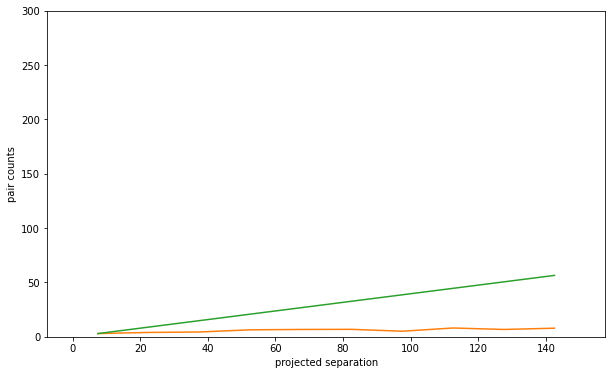

,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_cat_ID,prime_drawn_z,prime_drawn_M,prime_drawn_LX,prime_IR_AGN_DON,prime_IR_AGN_STR,partner_cat_ID,partner_drawn_z,partner_drawn_M,partner_drawn_LX,partner_IR_AGN_DON,partner_IR_AGN_STR,prime_control1_idx,prime_control2_idx,partner_control1_idx,partner_control2_idx,prime_control1_cat_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control1_IR_AGN_DON,prime_control1_IR_AGN_STR,prime_control2_cat_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,prime_control2_IR_AGN_DON,prime_control2_IR_AGN_STR,partner_control1_cat_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control1_IR_AGN_DON,partner_control1_IR_AGN_STR,partner_control2_cat_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,partner_control2_IR_AGN_DON,partner_control2_IR_AGN_STR,prime_cflag1,prime_cflag2,partner_cflag1,partner_cflag2,field,pXAGN_PR,pXAGN_PA,iXAGN_PR1,iXAGN_PR2,iXAGN_PA1,iXAGN_PA2,pDoAGN_PR,pDoAGN_PA,iDoAGN_PR1,iDoAGN_PR2,iDoAGN_PA1,iDoAGN_PA2,pStAGN_PR,pStAGN_PA,iStAGN_PR1,iStAGN_PR2,iStAGN_PA1,iStAGN_PA2
110,650,667,6.812245,0.080000,305.004251,56.299788,860,2.20,10.090000,-1.796137e+60,0,0,881,2.19,10.010000,-1.779625e+60,0,0,14831,2892,6982,6345,21872,1.19,10.730000,-4.968273e+59,0,0,3978,1.13,10.630000,-4.444670e+59,0,0,10045,1.59,10.390000,-9.193822e+59,0,0,9124,1.58,10.390000,-9.072964e+59,0,0,0,0,0,0,GDS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,866,842,2.737049,0.230000,0.000000,21.993686,1147,2.55,10.640000,-2.416595e+60,0,0,1121,2.55,10.410000,-2.416595e+60,0,0,2146,12206,-99,-99,2964,1.09,11.370000,-4.111949e+59,0,0,17949,0.92,10.750000,-2.845197e+59,0,0,-99,-99.00,-99.000000,-9.900000e+01,-99,-99,-99,-99.00,-99.000000,-9.900000e+01,-99,-99,0,0,2,2,GDS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149,952,1030,17.985508,0.060000,453.223127,144.139707,1270,2.58,10.250000,-2.473549e+60,0,0,1381,2.56,10.190000,1.352080e+42,1,1,11404,6483,4262,16956,16768,0.88,10.670000,-2.582035e+59,0,0,9324,0.86,10.710000,1.473277e+41,0,0,6015,0.74,10.490000,-1.766157e+59,0,0,24945,0.79,10.730000,-2.038758e+59,0,0,0,0,0,0,GDS,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
150,952,1062,15.060593,0.020000,-886.144605,120.698813,1270,2.58,10.250000,-2.473549e+60,0,0,1434,2.62,10.230000,-2.550394e+60,0,1,10942,14663,1113,5734,16082,2.69,10.200000,-2.687347e+60,0,0,21640,2.70,10.160000,-2.707167e+60,0,0,1506,1.88,11.060000,5.762787e+42,0,0,8216,1.75,10.960000,-1.123047e+60,0,0,0,0,0,0,GDS,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
151,957,952,0.693474,0.060000,224.049019,5.552685,1278,2.59,10.310000,-2.492663e+60,0,1,1270,2.58,10.250000,-2.473549e+60,0,0,6617,10167,12483,500,9515,0.68,10.920000,-1.466512e+59,0,0,14929,0.65,10.860000,1.044603e+41,0,0,18354,2.73,10.280000,4.393676e+43,1,1,656,2.75,10.290000,-2.807221e+60,0,0,0,0,0,0,GDS,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,18744,18632,9.940293,0.146344,0.000000,83.889205,25473,1.42,10.604226,-7.244068e+59,0,0,25323,1.42,10.457882,-7.244068e+59,0,1,1073,18086,17594,14442,1573,1.21,10.704151,-5.149315e+59,0,0,24555,1.17,10.683947,-4.790480e+59,0,0,23819,1.42,10.454845,-7.244068e+59,0,0,19473,1.42,10.450249,-7.244068e+59,0,0,0,0,0,0,UDS,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21628,19027,18612,1.108564,0.229520,489.374798,8.962194,25870,2.48,10.710963,-2.285984e+60,1,1,25300,2.46,10.481443,-2.249257e+60,0,0,12375,17167,19621,17173,16732,1.95,11.326336,-1.404304e+60,0,0,23212,1.87,11.274158,-1.288301e+60,0,0,26685,2.43,10.484300,-2.194662e+60,0,0,23218,2.51,10.503791,-2.341568e+60,0,0,0,0,0,0,UDS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21677,19247,18751,18.968137,0.070200,-932.090806,148.812986,26188

In [81]:
# fit data to natural scaling of areas of successive disks
ra = max_dist / n_bins
rn = np.arange(0,max_dist+max_dist/n_bins,max_dist/n_bins)
# create a list to store scaled pair numbers
np_scaled = []
# number of pairs in the inner circle -> do just the median now
np_a = df[bins['0']].iloc[1]
for n in range(0, len(bins)+1): 
    # Area ratio to center circle
    pnA = ( (n*ra)**2 - ((n-1)*ra)**2 ) / (ra**2)
    np_scaled.append(pnA*np_a)
# plt.plot(rn,np_a)

# I don't this will be helpful, we can plot them 
pcdata = [bin_gal_count_copy[col] for col in bin_gal_count_copy]
pair_counts = df.iloc[1].to_numpy()
fig = plt.figure(figsize=(10,6))

plt.violinplot(pcdata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
plt.plot(kpc_meds, pair_counts)
plt.plot(kpc_meds, np_scaled[1:])
plt.xlabel('projected separation')
plt.ylabel('pair counts')
plt.ylim(0,300)

plt.show()

it_df.loc[it_df['mass_ratio'] < 0.4]

In [182]:
# right now there is not evidence for AGN enhancement
# a few things:
## write code to account for pairs where a partner falls below a mass limit
### simply just say that the prime needs to be greater that 8.5, and any partner needs to be within a mass ratio limit

## seal with duplicate issue where mass ratio = 0, currently some unaccounted for duplicates

## control sampe not exactly representative of the pair sample

## currently, we are using zhi and low values for the mFDa approach, which is not consistent with the draws
### additionally, these are 68% confidence intervals
### will be solved when Dale sends more data
#   - could try making the dz threshold lower
#   - why are the pairs at higher z than expected?
#   - could be the result of poor zhi / zlow cuts (could run one iteration to find out

## could be worth correcting all of the pd warnings now that I fully understand loc...
#   - thought I fixed this but nope

## galaxy duplicate issue in counting AGN -> should be fixed in this code ^
#   - okay but don't we want to not do this before making bin cuts? perhaps it is just safest to select the closest pair
#   - in binning the prime galaxy and include the partner galaxies where in their own bins?
#   - ask Chris what we should do


# let's say the current version of the code is version 1.0
# these tasts will be implemented as different versions


In [183]:
# major issue now is that ID's appear in both the pair and control samples
# could be due to missuse of loc and iloc
# incorrect definitions for pair_df or iso_df

## Create Composite Photo-Z PDF's

In [27]:
# this will only work for photo-z draw only right now
# will need to include some kind of spec-z flag
fields = ['GOODSS','EGS','COSMOS','GOODSN','UDS']
bins = make_bins_PDF(max_dist=max_dist, n_bins=n_bins)

pair_means_all = {}
control_means_all = {}

data_path2 = 'photoz_results/kpc100/'

for key in bins:
    pair_means_all[bins[key]] = np.zeros((81, len(os.listdir(data_path+data_path2))))
    control_means_all[bins[key]] = np.zeros((81, len(os.listdir(data_path+data_path2))))

# generate a list of all filenames:
file_list = []
for idx in range(0, len(os.listdir(data_path+data_path2))):
    file = data_path+data_path2+(os.listdir(data_path+data_path2))[idx]
    file_list.append(file)
    
# Create a multiprocessing Pool
pool = Pool()  
# process fields iterable with pool -> parallelize code by field
    
all_data = pool.map(composite_PDFs, file_list)
    
# close pool
pool.close()
pool.join()


ValueError: invalid literal for int() with base 10: '00-99'

In [ ]:
# analyze output data and create composite PDFs
# create dictionaries to store means of all iterations
mean_comp_pair_all = {}
mean_comp_control_all = {}

for i in range(0, len(all_data)):
    it = all_data[i]
    pair_dict = it[0]
    control_dict = it[1]
    
    for key in bins:
        pair_means_all[bins[key]][:,i] = pair_dict[bins[key]]
        control_means_all[bins[key]][:,i] = control_dict[bins[key]]
        
# now take means of all the means of each iteration     
for key in bins:
    mean_comp_pair_all[bins[key]] = np.mean(pair_means_all[bins[key]], axis=1)
    mean_comp_control_all[bins[key]] = np.mean(control_means_all[bins[key]], axis=1)


In [ ]:
# finally plot
fig = plt.figure(figsize=(16,10))
comp_z = np.arange(-0.4, 0.41, 0.01)

for key in mean_comp_pair_all:
    # plt.plot(comp_z, mean_comp_pair_all[key] / mean_comp_control_all[key], label=key, linewidth=1)
    # plt.plot([-1,1],[1,1], c='black', linestyle='--', linewidth=1)
    # plt.plot([0,0],[-5,5], c='black', linestyle='--', linewidth=1)
    plt.plot(comp_z, mean_comp_control_all[key], label=key, linewidth=1)
    
    ### seems to be something goin on here... ###
    ### no reason why the PDF widths should be so correlated between pair and control ###

plt.legend(fontsize=10)
plt.xlabel('$z-z_{peak}$', fontsize=15)
plt.ylabel('$P(z)_{pair} / P(z)_{control}$', fontsize=15)
plt.title('Composite PDFs of control galaxies around peak probability, mean of means of each iteration', fontsize=20)
plt.xlim(-0.15,0.15)
plt.ylim(0,20)

# plt.xlim(-0.1,0.1)
plt.show()

In [21]:
# make this into a function:
def composite_PDFs(file):

    # take a similar approach as plotting pair/control mass/z distributions but also sort into bins
    # prime_cat_ID	partner_cat_ID	prime_control1_cat_ID	
    # prime_control2_cat_ID	partner_control1_cat_ID	partner_control2_cat_ID

    # create bins -> constants should be the same as when AGN fraction is calculated, so might as well comment out
    max_dist = 100
    n_bins = 8

    # load the random iteration
    ran_df = pd.read_csv(file)
    ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) & (ran_df['prime_drawn_z'] < 3.0) & (ran_df['field'] != 'GDS') ]
    ran_df = ran_df.fillna('666666666')

    # change field string names and ID so that the filenames can easily be created:
    # do ID first... this was designed kinda poorly on my part...
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 1, 
               'prime_cat_ID' ] = '0000'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 2, 
               'prime_cat_ID' ] = '000'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 3, 
               'prime_cat_ID' ] = '00'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 4, 
               'prime_cat_ID' ] = '0'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 5, 
               'prime_cat_ID' ] = (ran_df['prime_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 1, 
               'partner_cat_ID' ] = '0000'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 2, 
               'partner_cat_ID' ] = '000'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 3, 
               'partner_cat_ID' ] = '00'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 4, 
               'partner_cat_ID' ] = '0'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 5, 
               'partner_cat_ID' ] = (ran_df['partner_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'prime_control1_cat_ID' ] = '0000'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'prime_control1_cat_ID' ] = '000'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'prime_control1_cat_ID' ] = '00'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'prime_control1_cat_ID' ] = '0'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'prime_control1_cat_ID' ] = (ran_df['prime_control1_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'prime_control2_cat_ID' ] = '0000'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'prime_control2_cat_ID' ] = '000'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'prime_control2_cat_ID' ] = '00'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'prime_control2_cat_ID' ] = '0'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'prime_control2_cat_ID' ] = (ran_df['prime_control2_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'partner_control1_cat_ID' ] = '0000'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'partner_control1_cat_ID' ] = '000'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'partner_control1_cat_ID' ] = '00'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'partner_control1_cat_ID' ] = '0'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'partner_control1_cat_ID' ] = (ran_df['partner_control1_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'partner_control2_cat_ID' ] = '0000'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'partner_control2_cat_ID' ] = '000'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'partner_control2_cat_ID' ] = '00'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'partner_control2_cat_ID' ] = '0'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'partner_control2_cat_ID' ] = (ran_df['partner_control2_cat_ID'].astype(int)).astype(str)


    # now simply the field names
    ran_df.loc[ (ran_df['field'] == 'GDS'), 'field' ] = 'GOODSS'
    ran_df.loc[ (ran_df['field'] == 'COS'), 'field' ] = 'COSMOS'
    ran_df.loc[ (ran_df['field'] == 'GDN'), 'field' ] = 'GOODSN'


    ran_df['PR_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_cat_ID']+'.pzd'
    ran_df['PA_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_cat_ID']+'.pzd'
    ran_df['PRC1_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_control1_cat_ID']+'.pzd'
    ran_df['PRC2_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_control2_cat_ID']+'.pzd'
    ran_df['PAC1_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_control1_cat_ID']+'.pzd'
    ran_df['PAC2_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_control2_cat_ID']+'.pzd'


    # create a dictionary to store the CANDELS ID + field as the PDF filenames
    bin_pair = {}
    bin_control = {}

    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])

        # sort into bins
        bin_df = ran_df[ (ran_df['kpc_sep'] > low) & (ran_df['kpc_sep'] <= high) ]

        # create lists of the filenames for each bin and drop nan names
        PR_file = np.array(bin_df['PR_PDF_filename'])
        PA_file = np.array(bin_df['PA_PDF_filename'])
        PRC1_file = np.array(bin_df['PRC1_PDF_filename'])
        PRC2_file = np.array(bin_df['PRC2_PDF_filename'])
        PAC1_file = np.array(bin_df['PAC1_PDF_filename'])
        PAC2_file = np.array(bin_df['PAC2_PDF_filename'])
        pairs_file_all = np.concatenate((PR_file, PA_file), axis=0)
        control_file_all = np.concatenate((PRC1_file, PRC2_file, PAC1_file, PAC2_file), axis=0)

        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_GOODSS_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_EGS_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_COSMOS_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_GOODSN_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan

        cleaned_control = np.array([x for x in control_file_all if str(x) != 'nan'])

        bin_pair[bins[rnge]] = pairs_file_all
        bin_control[bins[rnge]] = cleaned_control
        
   # -------------------------------------------------------------------------------------------------------#

   # create a dictionary to store the composites of all of them
    comp_all_pair = {}
    comp_all_control = {}

    for key in bin_pair:
        # fig = plt.figure(figsize=[10,10])
        # plt.title(key)

        # create an array to store the composites for all the gal in this bin
        # will want to select values z_peak +/- 0.5
        comp_bin_pair = np.zeros((81, len(bin_pair[key])))
        comp_bin_control = np.zeros((81, len(bin_control[key])))

        for i, file in enumerate(bin_pair[key]):
            # identify fields based on filename and define z_peak
            file_field_end = file[-15:-12]
            if file_field_end == 'DSS': 
                file_field = 'GOODSS'
                z_peak = float(GDSz_cat.loc[ (GDSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'EGS': 
                file_field = 'EGS'
                z_peak = float(EGSz_cat.loc[ (EGSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'MOS': 
                file_field = 'COSMOS'
                z_peak = float(COSz_cat.loc[ (COSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'DSN': 
                file_field = 'GOODSN'
                z_peak = float(GDNz_cat.loc[ (GDNz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'UDS': 
                file_field = 'UDS'
                z_peak = float(UDSz_cat.loc[ (UDSz_cat['file'] == file), 'HB4_z_peak' ])
            # open PDF for this file:
            pdf_filename = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/'+file_field+'_OPTIMIZED03/'+file
            pdf = pd.read_csv(pdf_filename, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                                      'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')

            pdf['z_adj'] = pdf['z'] - z_peak

            # select the HB4 values where z is 0.5 within the z_peak
            upper = pdf.loc[ (pdf['z_adj'] < 0.401) & (pdf['z_adj'] >= 0), 'HB4' ] 
            lower = pdf.loc[ (pdf['z_adj'] > -0.401) & (pdf['z_adj'] < 0), 'HB4' ] 
            comp_bin_pair[40:(40+len(upper)),i] = upper
            comp_bin_pair[(40-len(lower)):40,i] = lower


            # subtract z_peak from all the z values in pdf
            # plt.plot(pdf['z_adj'], pdf['HB4'], color='g', alpha=0.1)    
            # plt.xlim(-0.5,0.5)
            # plt.xlabel('z')

        # Now for the control galaxies
        for j, file in enumerate(bin_control[key]):
            # identify fields based on filename and define z_peak
            file_field_end = file[-15:-12]
            if file_field_end == 'DSS': 
                file_field = 'GOODSS'
                z_peak = float(GDSz_cat.loc[ (GDSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'EGS': 
                file_field = 'EGS'
                z_peak = float(EGSz_cat.loc[ (EGSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'MOS': 
                file_field = 'COSMOS'
                z_peak = float(COSz_cat.loc[ (COSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'DSN': 
                file_field = 'GOODSN'
                z_peak = float(GDNz_cat.loc[ (GDNz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'UDS': 
                file_field = 'UDS'
                z_peak = float(UDSz_cat.loc[ (UDSz_cat['file'] == file), 'HB4_z_peak' ])
            # open PDF for this file:
            pdf_filename = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/'+file_field+'_OPTIMIZED03/'+file
            pdf = pd.read_csv(pdf_filename, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                                      'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')

            pdf['z_adj'] = pdf['z'] - z_peak

            # select the HB4 values where z is 0.5 within the z_peak
            upper = pdf.loc[ (pdf['z_adj'] < 0.401) & (pdf['z_adj'] >= 0), 'HB4' ] 
            lower = pdf.loc[ (pdf['z_adj'] > -0.401) & (pdf['z_adj'] < 0), 'HB4' ] 
            comp_bin_control[40:(40+len(upper)),j] = upper
            comp_bin_control[(40-len(lower)):40,j] = lower

        mean_comp_pair = np.mean(comp_bin_pair, axis=1)
        mean_comp_control = np.mean(comp_bin_control, axis=1)

        comp_all_pair[key] = mean_comp_pair
        comp_all_control[key] = mean_comp_control


        #     plt.plot(comp_z, mean_comp, color='r')   
        #     plt.show()
        
    return comp_all_pair, comp_all_control


In [22]:
# control_file_all

In [25]:
# Okay I have the pair and control filenames in each bin, so now I'll just have to load them and overplot
# load in the redshift catalogs for each field]
zPATH = '/nobackup/c1029594/CANDELS_AGN_merger_data/Pair Project - Updated Data/redshift_catalogs.full/'

GDSz_cat = pd.read_csv(zPATH+'zcat_GDS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
EGSz_cat = pd.read_csv(zPATH+'zcat_EGS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
COSz_cat = pd.read_csv(zPATH+'zcat_COS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
GDNz_cat = pd.read_csv(zPATH+'zcat_GDN_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
UDSz_cat = pd.read_csv(zPATH+'zcat_UDS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')

In [ ]:
fig = plt.figure(figsize=(16,10))
comp_z = np.arange(-0.4, 0.41, 0.01)

for key in comp_all_pair:
    # plt.plot(comp_z, comp_all_pair[key] / comp_all_control[key], label=key, linewidth=1)
    # plt.plot([-1,1],[1,1], c='black', linestyle='--', linewidth=1)
    # plt.plot([0,0],[-5,5], c='black', linestyle='--', linewidth=1)
    plt.plot(comp_z, comp_all_control[key], label=key, linewidth=1)
    
    ### seems to be something goin on here... ###
    ### no reason why the PDF widths should be so correlated between pair and control ###

plt.legend(fontsize=10)
plt.xlabel('$z-z_{peak}$', fontsize=15)
plt.ylabel('$P(z)_{pair} / P(z)_{control}$', fontsize=15)
plt.title('Composite PDFs of paired galaxies around peak probability', fontsize=20)
# plt.xlim(-0.4,0.4)
# plt.ylim(0,2)

plt.xlim(-0.1,0.1)
plt.show()

In [ ]:
# (len((ran_df['prime_cat_ID'].astype(int)).astype(str))) == 1
# ran_df.loc[ (pd.isna(ran_df['prime_control1_cat_ID']) == False) & ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1)]

# new idea is to turn every nan value in the DF to '666666666' okay let's rock
ran_df4 = ran_df.fillna(66666666)
ran_df

In [24]:
def make_bins_PDF(max_dist=100, n_bins=10):

    # modified version of make_bins that doesn't care about AGN fractions

    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
    
    return all_bins

In [ ]:
# check if they are duplicate:
for rnge in bins:
    aa = comp_all_pair[bins[rnge]]
    bb = comp_all_control[bins[rnge]]
    for idx in aa:
        if idx in bb:
            print('fuck')

In [ ]:
print(idx)